In [74]:
import numpy as np
from autograd import grad
import autograd.numpy as anp
import matplotlib.pyplot as plt

In [75]:
def golden_section(f, a, b, niter):
    rho = 0.5 * (3 - 5 ** 0.5)
    current_iter = 0
    while current_iter < niter:
        a_prime = a + rho * (b - a)
        b_prime = a + (1 - rho) * (b - a)
        if f(a_prime) >= f(b_prime):
            a = a_prime
        else:
            b = b_prime
        current_iter += 1
    return (b + a) / 2

#It takes 13 steps to get within 0.001 of log(4)
abs(np.log(4) - golden_section(lambda x: np.exp(x) - 4*x, 0, 3, 13))

0.00071614434567845997

In [76]:

def bisection(f, a, b, niter):
    current_iter = 0
    derivative = grad(f)
    while current_iter < niter:
        x_1 = (b + a) / 2
        deriv = derivative(x_1)
        if deriv > 0:
            b = x_1
        else:
            a = x_1
        current_iter += 1
    return x_1

#It takes 10 steps to get within 0.001 of log(4)
abs(np.log(4) - bisection(lambda x: anp.exp(x) - 4*x, 0, 3, 10))

0.00055217361989057245

In [77]:
%timeit golden_section(lambda x: np.exp(x) - 4*x, 0, 3, 13)
%timeit bisection(lambda x: anp.exp(x) - 4*x, 0, 3, 10)
#bisection is a lot slower because it needs to caluclate the derivative...

10000 loops, best of 3: 33.8 µs per loop
1000 loops, best of 3: 1.42 ms per loop


-0.204882912512
-0.298556128233
-0.290851859544
-0.290839315038
-0.290839314995


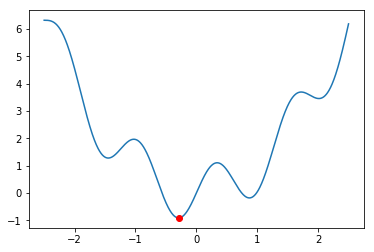

In [93]:
def newton(f, x_0, niter):
    current_iter = 0
    f_prime = grad(f)
    f_double_prime = grad(f_prime)
    while current_iter < niter:
        if f_double_prime(x_0) == 0:
            raise ValueError('The sequence does not converge since f_double_prime(x_{}) = 0'.format(count))
        x_1 = x_0 - (f_prime(x_0) / f_double_prime(x_0))
        print(x_1)
        x_0 = x_1
        current_iter += 1
    return x_1

minimizer = newton(lambda x: x ** 2 + anp.sin(5*x), -0.5, 5)
domain = np.linspace(-2.5, 2.5, 1000)
plt.plot(domain, domain ** 2 + np.sin(5*domain))
plt.plot(minimizer, minimizer ** 2 + np.sin(5*minimizer), 'ro')
plt.show()

-0.527567487894
-0.689735324366
-0.18196891629
-0.281477372739
-0.156590065244
-0.165813849944
-0.163680816734


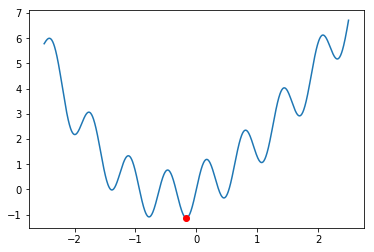

In [98]:
def secant(f, Df, x_0, x_1, niter):
    current_iter = 0
    while current_iter < niter:
        x_2 = x_1 - ((x_1 - x_0) / (Df(x_1) - Df(x_0))) * Df(x_1)
        print(x_2)
        x_0 = x_1
        x_1 = x_2
        current_iter += 1
    return x_2

minimizer = secant(lambda x: x ** 2 + np.sin(x) + np.sin(10*x), lambda x: 2*x + np.cos(x) + 10*np.cos(10*x), 0, -1, 7)
domain = np.linspace(-2.5, 2.5, 1000)
plt.plot(domain, domain ** 2 + np.sin(domain) + np.sin(10*domain))
plt.plot(minimizer, minimizer ** 2 + np.sin(minimizer) + np.sin(10*minimizer), 'ro')
plt.show()

In [110]:
def backtracking(f, Df, x, p):
    alpha = 1
    rho = 0.5
    c = 0.5
    fixed = Df(x).T*p
    while f(x + alpha*p) > f(x) + c*alpha*fixed:
        alpha = rho*alpha
    return alpha